In [57]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
from sympy import symbols, Eq, solve
from sympy import exp 
from sympy import sin 
from sympy import cos 
from scipy.optimize import fsolve

In [58]:
#math constants 
pi = 3.14159265359 
g = 9.81

In [59]:
#wheel velocity 

rpm = 3400
W = (rpm/60) * 2 * pi
r = 0.09
#v0 = W * r * 0.5 
#v0 = 13.85


In [60]:
#tennisbal constants

k = 1.5

C = 0.5
rho = 1.292
A = 0.003316625

cor = 0.66666
cof = 0.72

In [61]:
#launcher constants

theta = 15*pi/180
s0 = 1

In [62]:
y = 0 
x = 8
def equations(vars):
    v0, t = vars
    eq1 = (((x)*k) / (-exp(-k*t)+1))/cos(theta)-v0
    eq2 = ((k*(y+1)-g/k+g*t-((g/k)*exp(-k*t)))/(exp(-k*t)+1))/sin(theta)-v0
    return [eq1, eq2 ]

v0 , t = fsolve(equations, (1,1))
print(v0,t)

15.283669527807453 1.1172260249148387


In [63]:
#velocity

v0x = v0 * cos(theta)
vx = v0x
v0y = v0 * sin(theta)
print(v0x,v0y)

14.7628911173764 3.95570475284987


In [64]:
#time 

t = 0
tf = 3.0*v0y/g
dt = tf/2000

In [65]:
A = g/k

B = v0y + A

x = v0x/-k * exp(t*-k)
y = B/-k * exp(t*-k)-A*t

cx = -v0x/-k * exp(0*-k)
cy = B/-k * exp(0*-k)-A*0


In [66]:
i = 0 
x1 = []
y1 = []

In [67]:

#### first motion

while B/-k * exp(t*-k)-A*t-(cy-1) >= 0: 
        t = t + dt
        x1.append(v0x/-k * exp(t*-k)+cx)
        y1.append(B/-k * exp(t*-k)-A*t-(cy-1)) 
        #print(x[i],y[i])
        i = i + 1

print(t)

0.975014688317144


In [68]:
v0x2 = v0x * cof
v0y2 = -(v0y-g*t) * cor

xref = x1[i-1]

t = 0 
tf = 2.0*v0/g
dt = tf/2000

A = g/k

B = v0y2 + A

cx = -v0x2/-k * exp(0*-k)
cy = B/-k * exp(0*-k)-A*0


In [69]:
#### second motion

while B/-k * exp(t*-k)-A*t-(cy) >= 0:
        t = t + dt 
        x1.append(v0x2 /-k * exp(t*-k)+cx + xref)
        y1.append(B/-k * exp(t*-k)-A*t-cy) 
        #print(x[i],y[i])
        i = i + 1 

12.0051170073176
0.6574626443154701


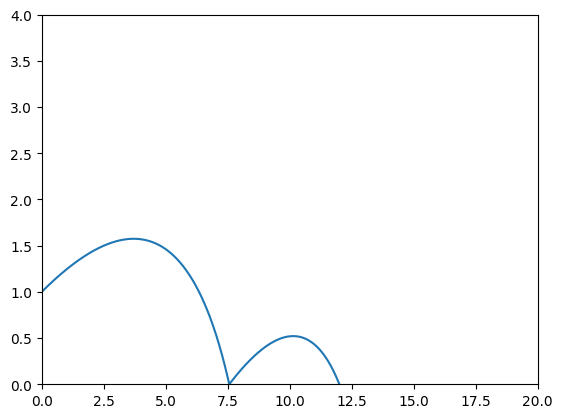

In [70]:
print(x1[i-1])
print(t)
plt.plot(x1,y1)
plt.xlim(0, 20)
plt.ylim(0, 4)
plt.show()